## ToMe Visualization
We provide some visualization functions to visualize the effect of ToMe like in our paper.

In [97]:
import timm
import tome
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
from PIL import Image

In [98]:
# We use the timm augreg models here, but you can use any supported implementation.
model_name = "deit_small_patch16_224"
model = timm.create_model(model_name, pretrained=True)

# Source tracing is necessary for visualization!
tome.patch.timm(model, trace_source=True)

In [99]:
input_size = model.default_cfg["input_size"][1]

# Make sure the transform is correct for your model!
transform_list = [
    transforms.Resize(int((256 / 224) * input_size), interpolation=InterpolationMode.BICUBIC),
    transforms.CenterCrop(input_size)
]

# The visualization and model need different transforms
transform_vis  = transforms.Compose(transform_list)
transform_norm = transforms.Compose(transform_list + [
    transforms.ToTensor(),
    transforms.Normalize(model.default_cfg["mean"], model.default_cfg["std"]),
])

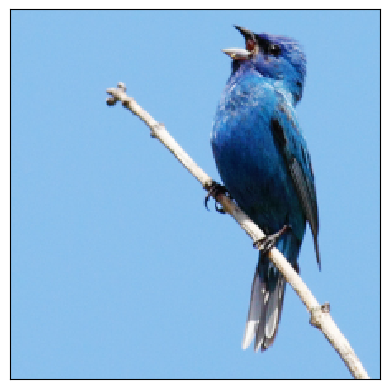

In [100]:
img = Image.open("images/BIRD_YELL_CLEAN.png")
img_vis = transform_vis(img)
img_norm = transform_norm(img)

img

## Visualize one image
You can play with the `r` value to get different numbers of tokens at the end of the network.

53 tokens at the end


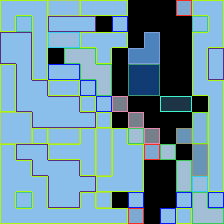

In [101]:
model.r = 12
_ = model(img_norm[None, ...])
source = model._tome_info["source"]

print(f"{source.shape[1]} tokens at the end")
tome.make_visualization(img_vis, source, patch_size=16, class_token=True)

## Visualize intermediate results
Setting `r` to be a list can let us control where we stop merging.

185 tokens at the end


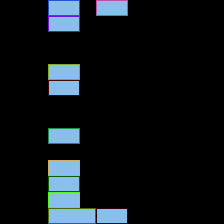

In [102]:
model.r = [12] * 1
_ = model(img_norm[None, ...])
source = model._tome_info["source"]

print(f"{source.shape[1]} tokens at the end")
tome.make_visualization(img_vis, source, patch_size=16, class_token=True)